### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [2]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [3]:
coffee_red.drinks_coffee.mean()

0.59499999999999997

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [4]:
coffee_red.query("drinks_coffee")["height"].mean()

68.119629908586163

In [5]:
coffee_red.query("not drinks_coffee")["height"].mean()

66.784922799278775

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [10]:
sam1 = np.random.choice(coffee_red.drinks_coffee,size=200,replace=True)

In [16]:
sam1.mean()

0.60499999999999998

In [17]:
(sam1 == False).mean()

0.39500000000000002

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

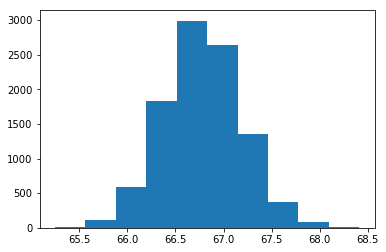

In [15]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

In [16]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.992913281575198, 67.584027382815734)

`5.`  Did your interval capture the actual average height of coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [17]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean() 

66.44340776214705

In [ ]:
# Captured by our interval, but not the exact same as the sample mean

### Confidence Interval - Difference In Means

Here you will look through the example for the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('../data/coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [12]:
diffs = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diffs.append(coff_mean - nocoff_mean)
    
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5) 
# statistical evidence coffee drinkers are on average taller

(0.10258900080921124, 2.5388333707966568)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [13]:
diffs_age = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_mean = bootsamp[bootsamp['age'] == '<21']['height'].mean()
    over21_mean = bootsamp[bootsamp['age'] != '<21']['height'].mean()
    diffs_age.append(over21_mean - under21_mean)
    
np.percentile(diffs_age, 0.5), np.percentile(diffs_age, 99.5)
# statistical evidence that over21 are on average taller

(3.3652749452554795, 5.0932450670661495)

`3.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [14]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.0593651244624267, 2.5931557940679042)

`4.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.

In [15]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    over21_coff_mean = bootsamp.query("age != '<21' and drinks_coffee == True")['height'].mean()
    over21_nocoff_mean = bootsamp.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_over21.append(over21_nocoff_mean - over21_coff_mean)
    
np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)
# For the over21 group, we have evidence that on average the non-coffee drinkers are taller

(1.8278953970883667, 4.4026329654774337)

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  

A larger idea for this is the idea of confounding variables altogether.  You will learn even more about these in the regression section of the course.

# traditional ci

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

coffee_full = pd.read_csv('coffee-dataset.csv')
coffee_red = coffee_full.sample(200)

In [2]:
diff = []

for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff.append(mean_coff - mean_nocoff)

np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(0.39656867909086274, 2.2432588681124224)

In [3]:
import statsmodels.stats.api as sms

X1 = coffee_red[coffee_red['drinks_coffee'] == True]['height'] 
X2 = coffee_red[coffee_red['drinks_coffee'] == False]['height']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

/Users/clamps/anaconda/envs/RoboND/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(0.39600106159185644, 2.2734131570228908)